# Classification of region of tracks with kNN

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
import matplotlib.pyplot as plt

We want to train a classifier using songs from the Spotify Charts. We hope to build a model that can learn some features that are characteristic for particular areas of the world.

We use a dataset containing tracks that only charted in one of the three regions in our region classification dataset (Americas, Asia, Europe).

In [2]:
from helpers.model import get_track_feature_region_dataset

X, y = get_track_feature_region_dataset().drop(columns="region"), get_track_feature_region_dataset().region

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2022, test_size=0.25)

In [4]:
k_vals_to_try = np.arange(1, 21)
metrics_to_try = ['manhattan', 'euclidean', 'chebyshev']
weights_to_try = ['uniform', 'distance']

scaled_knn = Pipeline(
    [
        ('scaler', MinMaxScaler()),
        ('knn', KNeighborsClassifier())
    ]
)

knn_params = {
    "knn__n_neighbors": k_vals_to_try,
    "knn__metric": metrics_to_try,
    "knn__weights": weights_to_try
}

scaled_knn_cv = GridSearchCV(
    scaled_knn,
    knn_params,
    verbose=10
)

In [5]:
scaled_knn_cv.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5; 1/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform
[CV 1/5; 1/120] END knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform;, score=0.653 total time=   0.7s
[CV 2/5; 1/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform
[CV 2/5; 1/120] END knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform;, score=0.647 total time=   0.6s
[CV 3/5; 1/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform
[CV 3/5; 1/120] END knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform;, score=0.649 total time=   0.6s
[CV 4/5; 1/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform
[CV 4/5; 1/120] END knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform;, score=0.661 total time=   0.6s
[CV 5/5; 1/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform
[CV 5/5; 1/120] END knn__metric=manhatt

GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['manhattan', 'euclidean', 'chebyshev'],
                         'knn__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'knn__weights': ['uniform', 'distance']},
             verbose=10)

In [6]:
scaled_knn_cv.best_params_

{'knn__metric': 'manhattan',
 'knn__n_neighbors': 20,
 'knn__weights': 'distance'}

In [7]:
best_scaled_knn = scaled_knn_cv.best_estimator_
best_scaled_knn.score(X_test, y_test)

0.7486910994764397

FYI: I tried the Grid Search before with 1 to 20 as possible values for k and achieved a test score of 73%.

### Standardizzing instead of min-max-scaling

In [8]:
std_knn = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())
    ]
)

std_knn_cv = GridSearchCV(
    std_knn,
    knn_params,
    verbose=10
)

In [9]:
std_knn_cv.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5; 1/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform
[CV 1/5; 1/120] END knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform;, score=0.686 total time=   2.4s
[CV 2/5; 1/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform
[CV 2/5; 1/120] END knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform;, score=0.691 total time=   2.4s
[CV 3/5; 1/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform
[CV 3/5; 1/120] END knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform;, score=0.693 total time=   2.4s
[CV 4/5; 1/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform
[CV 4/5; 1/120] END knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform;, score=0.707 total time=   2.5s
[CV 5/5; 1/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform
[CV 5/5; 1/120] END knn__metric=manhatt

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['manhattan', 'euclidean', 'chebyshev'],
                         'knn__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'knn__weights': ['uniform', 'distance']},
             verbose=10)

In [10]:
best_std_knn = std_knn_cv.best_estimator_
best_std_knn.score(X_test, y_test)

0.7658746140421533

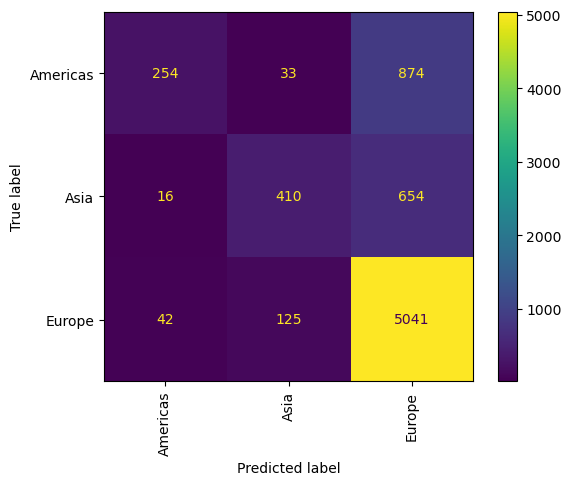

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = best_std_knn.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=best_std_knn.classes_)
labels = [l if (not l.startswith("Latin")) else "Latin America" for l in best_std_knn.classes_]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.xticks(rotation=90)
plt.show()

### Trying PCA

Text(0, 0.5, 'cumulative explained variance')

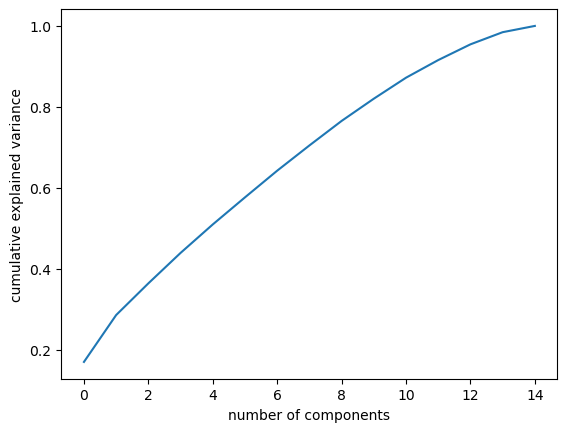

In [11]:
X_standardized = StandardScaler().fit_transform(X)
pca=PCA()
pca.fit(X_standardized)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [12]:
std_pca_knn = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('pca', PCA()),
        ('knn', KNeighborsClassifier())
    ]
)

pca_params = {
    "pca__n_components": np.arange(1,12)
}

pca_knn_cv = GridSearchCV(
    std_pca_knn,
    {**pca_params, **knn_params},
    verbose=10,
    n_jobs=-1) # run jobs in parallel on all available processors

In [13]:
#pca_knn_cv.fit(X_train,y_train)

In [14]:
pca_knn_cv.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
best_pca_knn = pca_knn_cv.best_estimator_
best_pca_knn.score(X_test, y_test)

0.747906976744186

In [ ]:
import skops.io as sio
sio.dump(best_pca_knn, "best_pca_knn.joblib")

In [ ]:
sio.dump(best_scaled_knn, "best_scaled_knn.joblib")

In [ ]:
y_pred = best_pca_knn.predict(X_train)

In [ ]:
y_pred

array(['Oceania', 'Europe', 'Europe', ..., 'Europe', 'Americas', 'Europe'],
      dtype=object)

In [ ]:
from sklearn.dummy import DummyClassifier

In [ ]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_test, y_test)

0.696079734219269

In [ ]:
dummy_clf = DummyClassifier(strategy="uniform")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_test, y_test)

0.25475083056478404

In [ ]:

# ANOVA feature selection for numeric input and categorical output
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

fs = SelectKBest(score_func=f_classif, k=5)
X_selected = fs.fit_transform(X, y)

In [ ]:
X_selected

array([[0.00000e+00, 5.88000e-01, 1.73000e-01, 9.37000e-01, 1.95274e+05],
       [0.00000e+00, 7.80000e-01, 5.32000e-02, 8.37000e-01, 2.27693e+05],
       [0.00000e+00, 5.98000e-01, 1.59000e-01, 5.75000e-01, 2.54069e+05],
       ...,
       [0.00000e+00, 5.05000e-01, 2.70000e-02, 5.88000e-01, 3.52000e+05],
       [0.00000e+00, 5.22000e-01, 4.41000e-02, 7.78000e-01, 2.17687e+05],
       [1.00000e+00, 8.03000e-01, 7.25000e-02, 8.08000e-01, 1.41176e+05]])

In [ ]:
fs.get_feature_names_out()

array(['explicit', 'danceability', 'speechiness', 'valence',
       'duration_ms'], dtype=object)